In [27]:
import pandas as pd
import numpy as np
import pickle

In [28]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1500

In [29]:
df = pd.read_excel('C:/Users/Anastasiya.Mittseva/PycharmProjects/ProjectPredictSolidity/prepared_data.xlsx')

In [30]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,%А остаточный,HV,HRC
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.11,NaN,NaN,NaN,NaN,NaN,180.0,NaN
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,0.31,NaN,NaN,NaN,NaN,NaN,180.0,NaN
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,1.00,NaN,NaN,NaN,NaN,NaN,180.0,NaN
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,3.40,NaN,NaN,NaN,NaN,NaN,195.0,NaN
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.549333,850,10,810.626512,735.0,795.0,7.00,NaN,NaN,NaN,NaN,NaN,200.0,NaN


## Подготовка данных

In [31]:
def convertHRCtoHV(x):
    y = 0.0001076546813696400 * x ** 4 - 0.01404920211793480 * x ** 3 + 0.7989548243359580 * x ** 2 - 13.82475417563670 * x + 289.8692821768870
    return y

In [32]:
def repl(x):
    if np.isnan(x):
        return round(convertHRCtoHV(df['HRC'].loc[x.index]),2)
    else:
        return x

In [33]:
df['HRC'] = df['HRC'].map(convertHRCtoHV)

In [34]:
df['HV'] = df['HV'].combine_first(df['HRC'])

In [35]:
df = df.drop('HRC',1)

In [36]:
df = df.fillna(0)

In [37]:
df = df[~(df['HV'] == 0.0)]

In [38]:
df = df.drop(df[df['%А остаточный'] != 0].index)

In [39]:
df = df.drop('%А остаточный',1)

In [40]:
df = df[~(df['V800-500 °C/c']== 0.0)]

In [41]:
# df = df.drop(df[(df['%Ф']+df['%П']+df['%Б']+df['%М']) != 100].index)

In [42]:
df = df.reset_index()

In [43]:
df = df.drop('index',1)

In [44]:
df.head()

,Сталь,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,Тнагрева,"время выдержки, мин",параметр закалки,Ас1,Ас3,V800-500 °C/c,%Ф,%П,%Б,%М,HV
0,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,0.11,0.0,0.0,0.0,0.0,180.0
1,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,0.31,0.0,0.0,0.0,0.0,180.0
2,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,1.00,0.0,0.0,0.0,0.0,180.0
3,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,3.40,0.0,0.0,0.0,0.0,195.0
4,32г2,0.32,1.1,0.27,0.02,0.017,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.549333,850,10,810.626512,735.0,795.0,7.00,0.0,0.0,0.0,0.0,200.0


In [45]:
df_up15 = df[(df['V800-500 °C/c']>15)]
df_down15 = df[(df['V800-500 °C/c']<15)]

In [46]:
df_up15 = df_up15.reset_index()
df_down15 = df_down15.reset_index()

In [47]:
df_up15 = df_up15.drop('index',1)
df_down15 = df_down15.drop('index',1)

## Графики 

In [48]:
import  seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

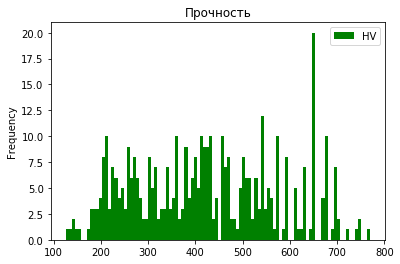

In [49]:
df_up15.plot(y='HV', kind='hist', color='green', title='Прочность', bins=100)
plt.show()

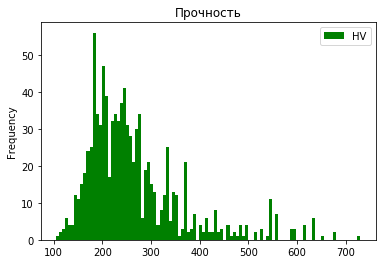

In [50]:
df_down15.plot(y='HV', kind='hist', color='green', title='Прочность', bins=100)
plt.show()

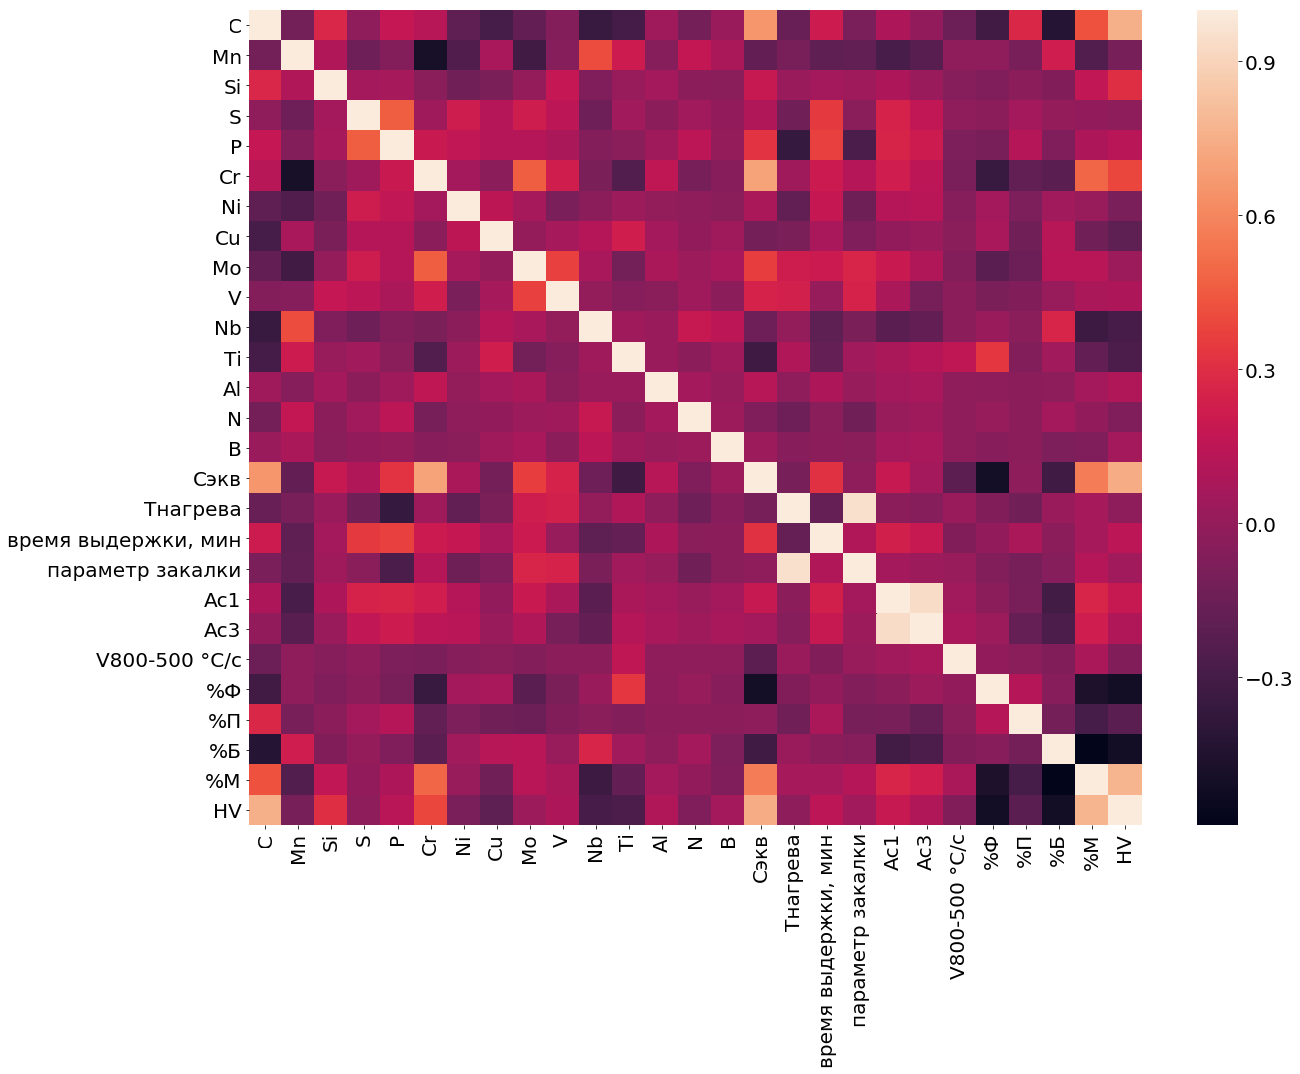

In [51]:
plt.rcParams.update({'font.size': 20})
plt.subplots(figsize=(20,15))

corr = df_up15.corr()
corr_hm = sns.heatmap(corr)
fig = corr_hm.get_figure()

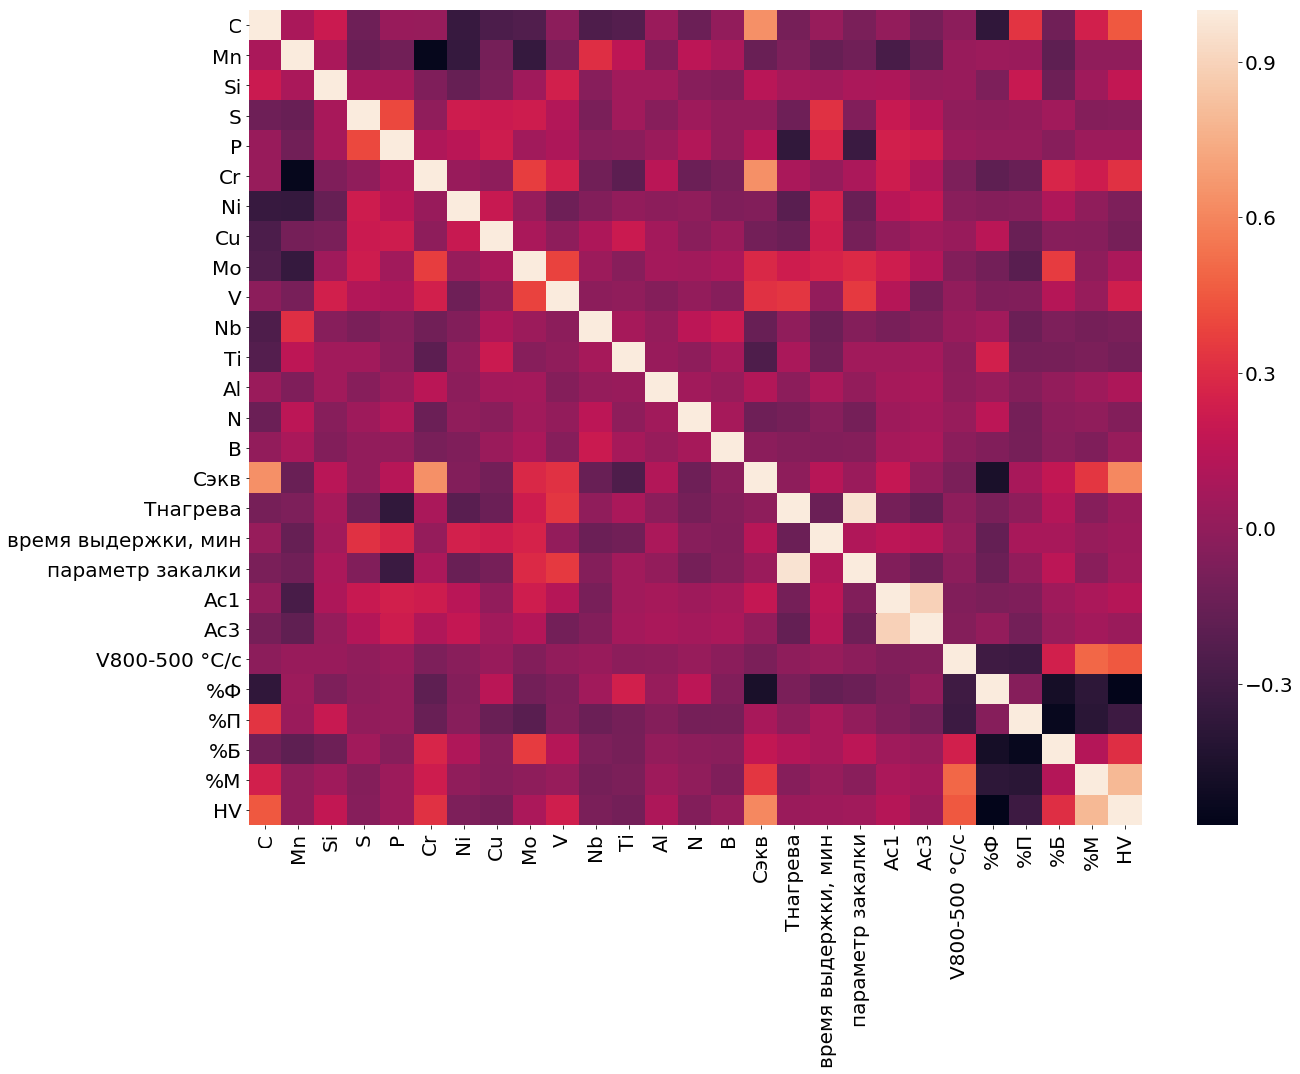

In [52]:
plt.rcParams.update({'font.size': 20})
plt.subplots(figsize=(20,15))

corr = df_down15.corr()
corr_hm = sns.heatmap(corr)
fig = corr_hm.get_figure()

In [53]:
df_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti',
       'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']

In [54]:
ls_targets = ['HV']

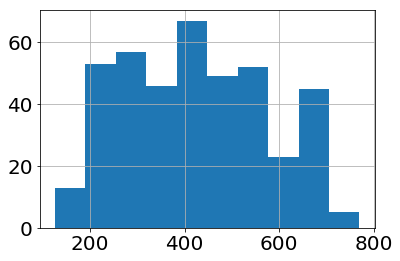

In [55]:
df_up15['HV'].hist()

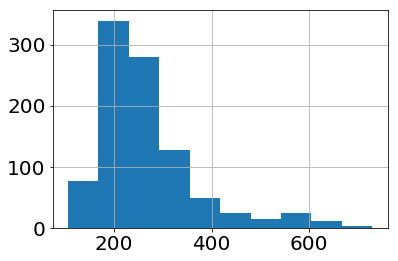

In [56]:
df_down15['HV'].hist()

In [57]:
df_up15[df_col+ ls_targets].corr()

,С,Mn,Si,S,P,Cr,Ni,Cu,Mo,V,Nb,Ti,Al,N,B,Сэкв,параметр закалки,V800-500 °C/c,HV
С,1.000000,-0.118440,0.271035,-0.014219,0.178259,0.128341,-0.194063,-0.295241,-0.184995,-0.056366,-0.346983,-0.300569,0.040786,-0.116126,0.023626,0.657610,-0.093484,-0.148566,0.756196
Mn,-0.118440,1.000000,0.106333,-0.135785,-0.057179,-0.482899,-0.257347,0.073987,-0.310952,-0.050216,0.404928,0.206552,-0.053271,0.172308,0.082083,-0.178836,-0.186309,-0.013830,-0.109493
Si,0.271035,0.106333,1.000000,0.051485,0.064476,-0.037993,-0.134663,-0.089605,0.003535,0.176812,-0.077495,0.016440,0.052068,-0.031535,-0.039783,0.193402,0.039509,-0.050695,0.302214
S,-0.014219,-0.135785,0.051485,1.000000,0.463167,0.036956,0.216631,0.121334,0.214366,0.145523,-0.141335,0.047896,-0.034983,0.045361,-0.007363,0.098116,-0.042196,-0.012822,-0.019667
P,0.178259,-0.057179,0.064476,0.463167,1.000000,0.194671,0.164279,0.122853,0.115782,0.078593,-0.060143,-0.039000,0.038512,0.146935,0.002795,0.322462,-0.276032,-0.084531,0.134607
Cr,0.128341,-0.482899,-0.037993,0.036956,0.194671,1.000000,0.052805,-0.034670,0.463198,0.227361,-0.090736,-0.251911,0.161270,-0.104487,-0.044342,0.702592,0.113574,-0.092856,0.389451
Ni,-0.194063,-0.257347,-0.134663,0.216631,0.164279,0.052805,1.000000,0.153708,0.063803,-0.094898,-0.026870,0.027177,-0.003428,-0.012821,-0.041084,0.080960,-0.143224,-0.048848,-0.093054
Cu,-0.295241,0.073987,-0.089605,0.121334,0.122853,-0.034670,0.153708,1.000000,0.001445,0.066656,0.124394,0.225748,0.061891,-0.010605,0.033172,-0.114030,-0.076457,-0.040435,-0.201012
Mo,-0.184995,-0.310952,0.003535,0.214366,0.115782,0.463198,0.063803,0.001445,1.000000,0.364960,0.069426,-0.118409,0.077434,0.030853,0.069570,0.359598,0.264655,-0.055553,0.028688
V,-0.056366,-0.050216,0.176812,0.145523,0.078593,0.227361,-0.094898,0.066656,0.364960,1.000000,-0.004862,-0.053720,-0.039069,0.042380,-0.026453,0.255300,0.254215,-0.024594,0.088559


In [58]:
df_up15[df_col].corrwith(df_up15['HV'])

С                   0.756196
Mn                 -0.109493
Si                  0.302214
S                  -0.019667
P                   0.134607
Cr                  0.389451
Ni                 -0.093054
Cu                 -0.201012
Mo                  0.028688
V                   0.088559
Nb                 -0.289948
Ti                 -0.271128
Al                  0.099726
N                  -0.075829
B                   0.058301
Сэкв                0.745356
параметр закалки    0.048430
V800-500 °C/c      -0.072259
dtype: float64

In [59]:
df_down15[df_col].corrwith(df_down15['HV'])

С                   0.449438
Mn                 -0.007534
Si                  0.179405
S                  -0.041223
P                   0.035090
Cr                  0.323041
Ni                 -0.073699
Cu                 -0.094860
Mo                  0.094015
V                   0.233824
Nb                 -0.081821
Ti                 -0.109340
Al                  0.099808
N                  -0.054417
B                   0.019005
Сэкв                0.608897
параметр закалки    0.053980
V800-500 °C/c       0.452740
dtype: float64

## train_test_split 

In [32]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df_up15[ls_train_col]
y_input = df_up15[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

rfr = RandomForestRegressor(max_features = 10, max_depth = 15, min_samples_leaf = 2, n_estimators=100, criterion='mse')

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [33]:
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

In [34]:
rfr.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [35]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, rfr)

Score:  0.84
R^2:  0.84
MAE:  41.18
MSE:  3529.98
Correlation  0.92


In [36]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.85
R^2:  0.85
MAE:  38.47
MSE:  2928.68
Correlation  0.92


In [37]:
y_predict_test = rfr.predict(x_test)

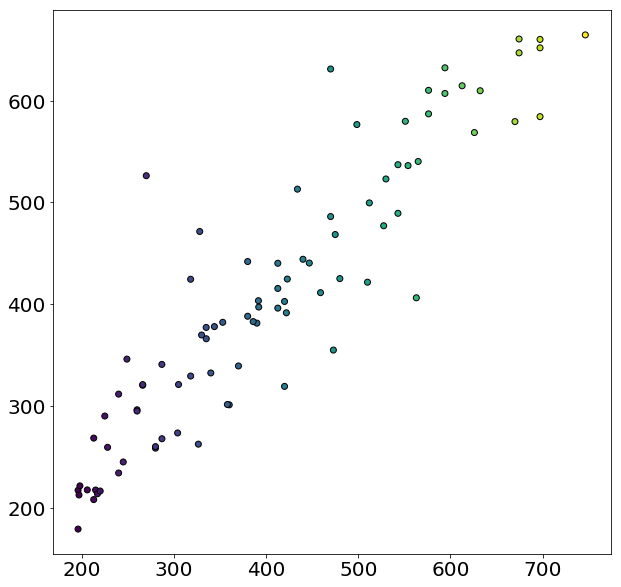

In [38]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [39]:
y_predict_valid = rfr.predict(x_valid)

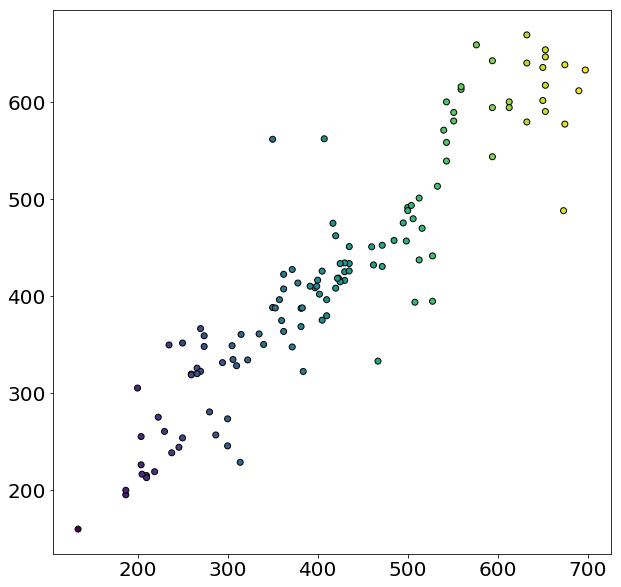

In [40]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [41]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(test_corr) + '_test_r2_' + str(test_r2) + '_train_test_split.sav'
pickle.dump(rfr, open(filename, 'wb'))

##  KFold

In [41]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df_up15[ls_train_col]
y_input = df_up15[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

rfr = RandomForestRegressor(max_features = 12, max_depth = 15, min_samples_leaf = 1, n_estimators=200, criterion='mse')

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [42]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr.fit(x_train, y_train)
    
    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.81
R^2:  0.81
MAE:  40.8
MSE:  4040.92
Correlation  0.9


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.89
R^2:  0.89
MAE:  42.19
MSE:  2838.42
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.92
R^2:  0.92
MAE:  30.42
MSE:  1909.98
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.82
R^2:  0.82
MAE:  38.91
MSE:  3190.78
Correlation  0.91


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score:  0.92
R^2:  0.92
MAE:  32.93
MSE:  2112.45
Correlation  0.96


In [43]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.87
0.87
37.05
2818.51
0.94


In [44]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.88
R^2:  0.88
MAE:  38.09
MSE:  2794.53
Correlation  0.94


In [45]:
y_predict = rfr.predict(x_test)

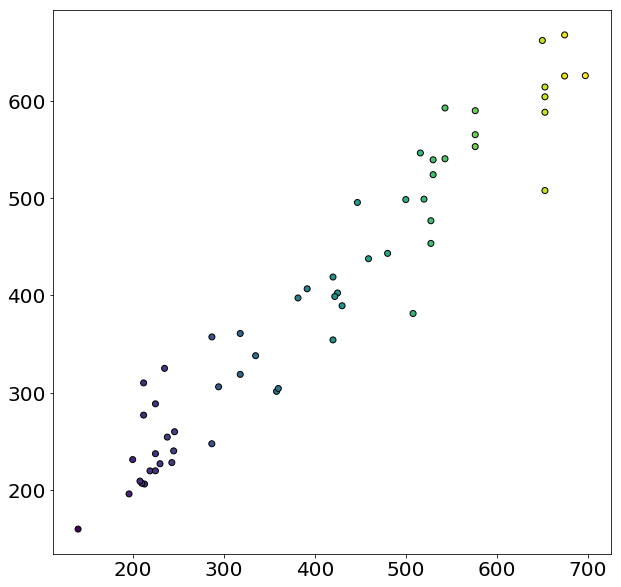

In [46]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [47]:
y_predict = rfr.predict(x_valid)

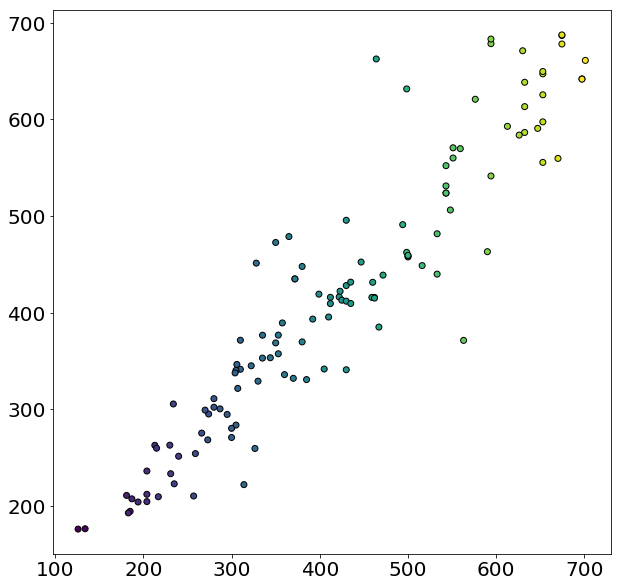

In [48]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [49]:
y_predict_to_dataframe = pd.DataFrame({'y_predict': y_predict})

In [50]:
y_valid_to_dataframe = y_valid.reset_index()

In [51]:
 result = pd.merge(y_valid_to_dataframe, y_predict_to_dataframe, left_index=True, right_index=True)

In [52]:
result.head()

,index,HV,y_predict
0,264,430.000000,495.443299
1,41,594.017762,541.264245
2,69,230.000000,262.717872
3,65,305.000000,283.526201
4,218,259.000000,254.005878


In [146]:
result.to_excel('predict_valid_HV.xlsx')

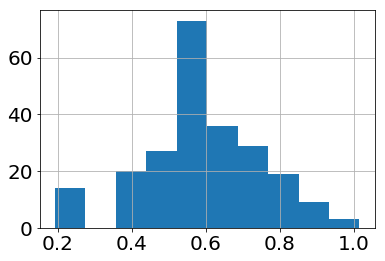

In [53]:
x_train['Сэкв'].hist()

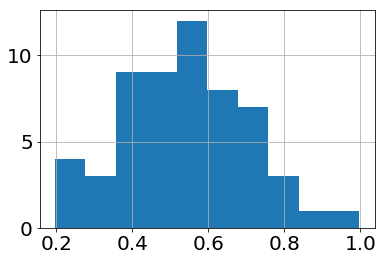

In [54]:
x_test['Сэкв'].hist()

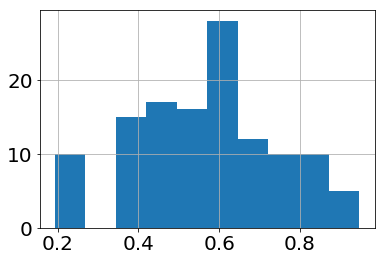

In [55]:
x_valid['Сэкв'].hist()

In [150]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(listScore[4]) + '_test_r2_' + str(listScore[1]) + '_K_fold.sav'
pickle.dump(rfr, open(filename, 'wb'))

## GridSearchCV_df_up15

In [56]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df_up15[ls_train_col]
y_input = df_up15[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [57]:
param_grid = {
    'max_depth': range(6, 18, 2),
    'max_features': range(6, 18, 2),
    'min_samples_leaf': range(1, 5),
    'n_estimators': range(50, 300, 50)
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_absolute_error')

In [64]:
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

In [65]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   12.1s


KeyboardInterrupt: 

In [59]:
grid_search.best_params_

{'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [60]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, grid_search)

Score:  -33.65
R^2:  0.92
MAE:  33.65
MSE:  2069.25
Correlation  0.96


In [61]:
y_predict_test = grid_search.predict(x_test)

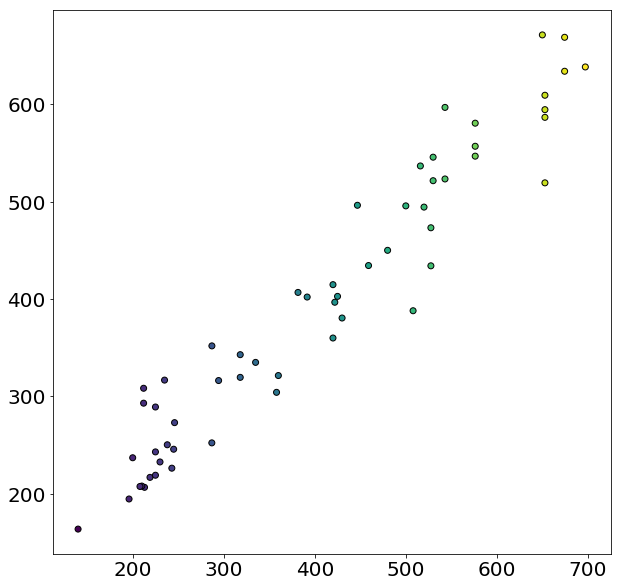

In [62]:
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
# plt.colorbar()
plt.show()

In [63]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr  = print_and_return_score(x_valid, y_valid, grid_search)

Score:  -23.51
R^2:  0.96
MAE:  23.51
MSE:  1067.98
Correlation  0.98


In [64]:
y_predict_valid = grid_search.predict(x_valid)

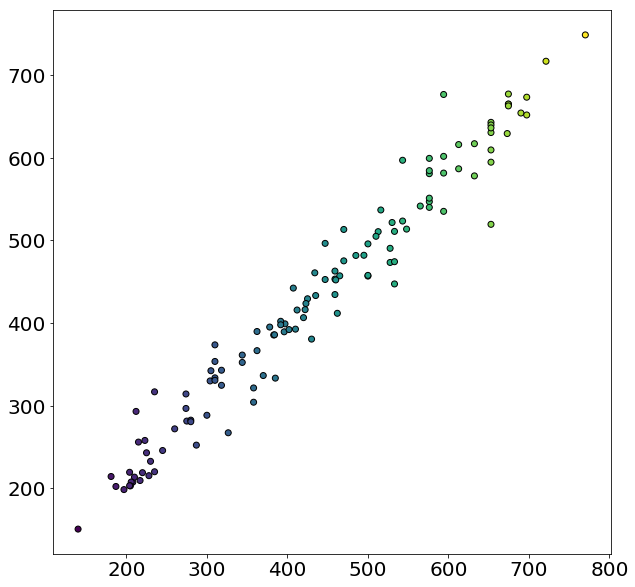

In [65]:
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

## GridSearchCV_df_down15

In [82]:
from sklearn.model_selection import  train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error

ls_train_col = ['С', 'Mn', 'Si', 'S', 'P', 'Cr', 'Ni', 'Cu', 'Mo', 'V', 'Nb', 'Ti', 'Al', 'N', 'B', 'Сэкв','параметр закалки','V800-500 °C/c']
targets = ['HV']

x_input = df_down15[ls_train_col]
y_input = df_down15[targets]

x, x_valid, y, y_valid = train_test_split(x_input, y_input, test_size=0.3)

def print_and_return_score(x, y, est):
    y_pred = est.predict(x)
    scr = est.score(x, y)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    corr = np.corrcoef(y.iloc[:].T, y_pred[:])
        
    print('Score: ', round(scr, 2))
    print('R^2: ', round(r2, 2))
    print('MAE: ', round(mae, 2))
    print('MSE: ', round(mse, 2))
    print('Correlation ', round(corr[0][1], 2))
    
    return [scr,r2, mae, mse, corr[0][1]]

In [83]:
param_grid = {
    'max_depth': range(6, 18, 2),
    'max_features': range(6, 18, 2),
    'min_samples_leaf': range(1, 5),
    'n_estimators': range(50, 300, 50)
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='neg_mean_absolute_error')

In [84]:
x_train,  x_test,  y_train,  y_test  =  train_test_split (x, y, test_size=0.3)

In [86]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.7min finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(6, 18, 2), 'max_features': range(6, 18, 2), 'min_samples_leaf': range(1, 5), 'n_estimators': range(50, 300, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=2)

In [87]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr = grid_search.best_estimator_
    rfr.fit(x_train, y_train)

    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.87
R^2:  0.87
MAE:  25.72
MSE:  1678.62
Correlation  0.94


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.87
R^2:  0.87
MAE:  23.83
MSE:  1262.88
Correlation  0.94


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.88
R^2:  0.88
MAE:  24.33
MSE:  1221.61
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.83
R^2:  0.83
MAE:  24.37
MSE:  1825.9
Correlation  0.92


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.88
R^2:  0.88
MAE:  22.35
MSE:  1085.91
Correlation  0.94


In [88]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.87
0.87
24.12
1414.98
0.94


In [89]:
grid_search.best_params_

{'max_depth': 14,
 'max_features': 12,
 'min_samples_leaf': 1,
 'n_estimators': 200}

In [90]:
test_scr, test_r2, test_mae, test_mse, test_corr = print_and_return_score(x_test, y_test, grid_search)

Score:  -22.35
R^2:  0.88
MAE:  22.35
MSE:  1085.91
Correlation  0.94


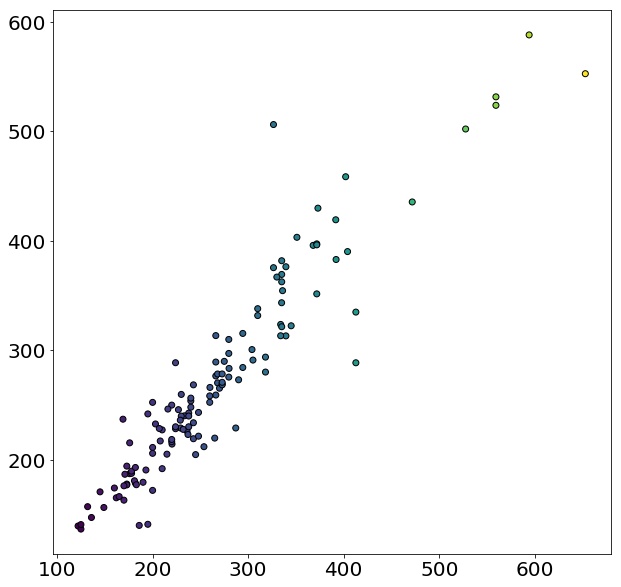

In [91]:
y_predict_test = grid_search.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
# plt.colorbar()
plt.show()

In [72]:
df_down15.shape[0]

949

In [63]:
filename = 'model_RFR_corr_valid_df_up15_V'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(test_corr) + '_test_r2_' + str(test_r2) + '_train_test_split_gridSearch.sav'
pickle.dump(rfr, open(filename, 'wb'))

In [99]:
kfold = model_selection.KFold(n_splits=5, shuffle=True)
scores = []
for train, test in kfold.split(x, y):
    x_train, y_train = x.iloc[train], y.iloc[train]
    x_test, y_test = x.iloc[test], y.iloc[test]
    rfr = grid_search.best_estimator_
    rfr.fit(x_train, y_train)

    scores.append(print_and_return_score(x_test, y_test, rfr))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.91
R^2:  0.91
MAE:  27.37
MSE:  1606.35
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.93
R^2:  0.93
MAE:  23.88
MSE:  1212.76
Correlation  0.97


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.92
R^2:  0.92
MAE:  29.12
MSE:  1728.83
Correlation  0.96


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.91
R^2:  0.91
MAE:  30.19
MSE:  1984.13
Correlation  0.95


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Score:  0.9
R^2:  0.9
MAE:  26.72
MSE:  1852.67
Correlation  0.95


In [100]:
listScore = []
for i in range(5):
    tmp = []
    for j in range(5):
        tmp.append(scores[j][i])
    listScore.append(round(np.mean(tmp), 2))
    print(round(np.mean(tmp), 2))

0.91
0.91
27.46
1676.95
0.96


In [101]:
valid_scr, valid_r2, valid_mae, valid_mse, valid_corr = print_and_return_score(x_valid, y_valid, rfr)

Score:  0.89
R^2:  0.89
MAE:  29.53
MSE:  2078.07
Correlation  0.95


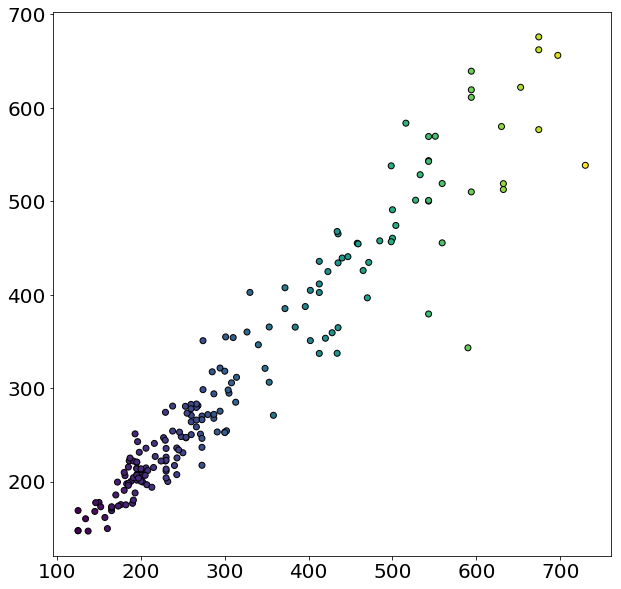

In [77]:
y_predict_test = rfr.predict(x_test)

plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

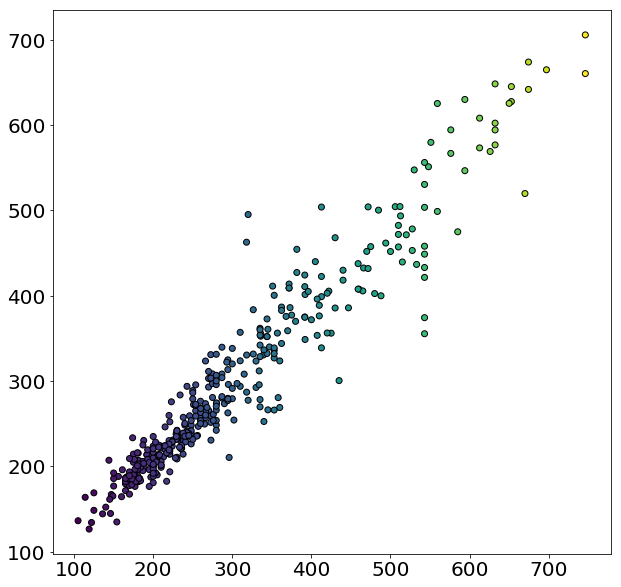

In [78]:
y_predict_valid = rfr.predict(x_valid)

plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()

In [79]:
filename = 'model_RFR_corr_valid_'+ str(valid_corr) + '_valid_r2_' + str(valid_r2) + 'corr_test_' + str(listScore[4]) + '_test_r2_' + str(listScore[1]) + '_K_fold_GridSearch.sav'
pickle.dump(rfr, open(filename, 'wb'))

## Loaded_model 

In [151]:
loaded_model = pickle.load(open('model_RFR_corr_valid_0.9561486258289654_valid_r2_0.9101636386129961corr_test_0.95_test_r2_0.91_K_fold.sav', 'rb'))

In [152]:
result = loaded_model.score(x_test, y_test)
print(result)

0.911136318450453


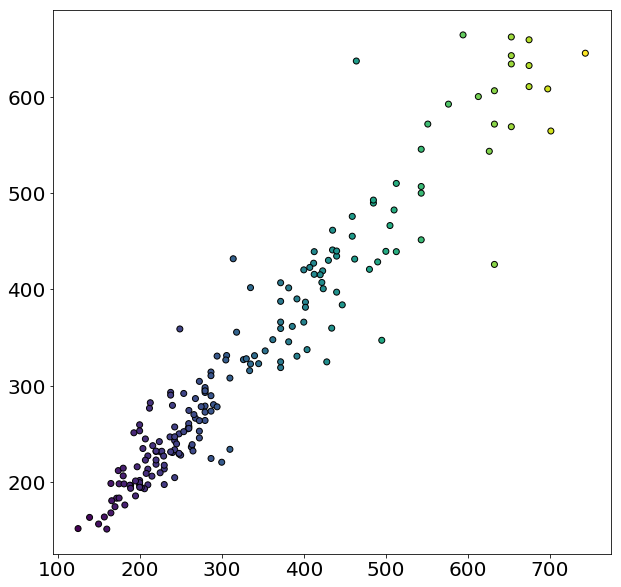

In [153]:
y_predict_test = loaded_model.predict(x_test)
plt.subplots(figsize=(10,10))
plt.scatter(y_test, y_predict_test, marker='o', c=y_test, edgecolors='black', cmap='viridis')
plt.show()

In [154]:
result = loaded_model.score(x_valid, y_valid)
print(result)

0.9101636386129961


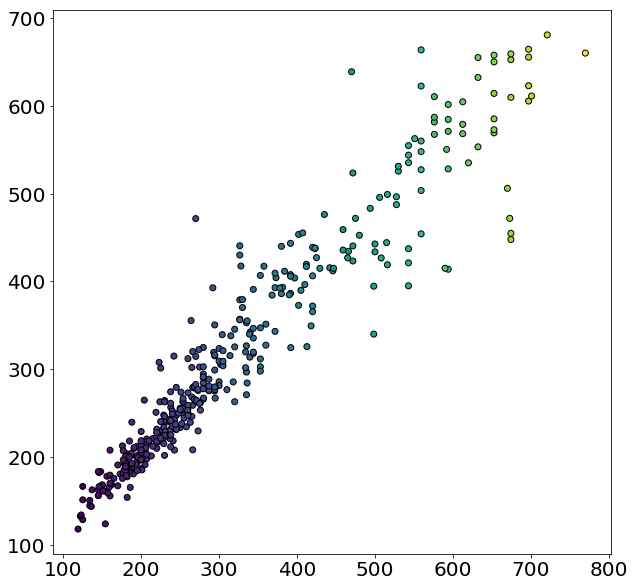

In [155]:
y_predict_valid = loaded_model.predict(x_valid)
plt.subplots(figsize=(10,10))
plt.scatter(y_valid, y_predict_valid, marker='o', c=y_valid, edgecolors='black', cmap='viridis')
plt.show()